# US Census Data Analysis

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import glob
import os

## Data Loading and Inspecting

In [167]:
path ='D:/Data Analysis/US_Census/data'
census_files = glob.glob(os.path.join(path, "*.csv")) 
df_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    df_list.append(data)

us_census = pd.concat(df_list).reset_index()
us_census.head()

,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN
3,3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,NaN,NaN,NaN
4,4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,NaN,NaN,NaN


In [168]:
us_census.shape

(170, 14)

In [169]:
us_census.size

2380

In [170]:
us_census.describe().T

,count,mean,std,min,25%,50%,75%,max
index,170.0,3.614706e+01,3.575569e+01,0.0,3.0,24.5,66.75,109.0
Unnamed: 0,170.0,5.277059e+01,5.963022e+01,0.0,3.0,24.5,118.75,169.0
TotalPop,170.0,6.076399e+06,6.716060e+06,626604.0,1851420.0,4397353.0,6705586.00,38421464.0
MalePop,51.0,3.081423e+06,3.464446e+06,306674.0,921618.5,2164208.0,3393406.50,19087135.0
FemalePop,51.0,3.183644e+06,3.553646e+06,318031.0,938774.0,2233145.0,3476837.50,19334329.0


In [171]:
us_census.columns

Index(['index', 'Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'MalePop', 'FemalePop',
       'GenderPop'],
      dtype='object')

In [172]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       170 non-null    int64  
 1   Unnamed: 0  170 non-null    int64  
 2   State       170 non-null    object 
 3   TotalPop    170 non-null    int64  
 4   Hispanic    170 non-null    object 
 5   White       170 non-null    object 
 6   Black       170 non-null    object 
 7   Native      170 non-null    object 
 8   Asian       170 non-null    object 
 9   Pacific     165 non-null    object 
 10  Income      170 non-null    object 
 11  MalePop     51 non-null     float64
 12  FemalePop   51 non-null     float64
 13  GenderPop   60 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 18.7+ KB


By glancing at the data sample and its data types, we can see some ir-regularity's in our data, some of them:
<ul>
    <li>
Variable index and Unnamed: 0 seems doesn't add any information to our data.</li>
    <li>The race variable (Hispanic, White, Black, etc.) shows percentage yet the data types is object.</li>
    <li>Income appears to shows continous numbers, yet the data type is object.</li>
    <li>Variable GenderPop shows the population for male and female. It would be better to separate this column to each gender population.</li>
    <li>Before cleaning and transforming the dataset, let's see if our data has missing values and duplicated values</li>
</ul>

In [173]:
us_census.isna().sum()

index           0
Unnamed: 0      0
State           0
TotalPop        0
Hispanic        0
White           0
Black           0
Native          0
Asian           0
Pacific         5
Income          0
MalePop       119
FemalePop     119
GenderPop     110
dtype: int64

In [174]:
us_census.duplicated().value_counts()

False    170
dtype: int64

In [175]:
us_census.dtypes

index           int64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
MalePop       float64
FemalePop     float64
GenderPop      object
dtype: object

## Cleaning the data

In [176]:
us_census_raw=us_census.copy()

In [177]:
# removing the `index` and `Unnamed: 0` column
us_census=us_census.drop(['index','Unnamed: 0'], axis=1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN


In [178]:
us_census.Income=us_census.Income.replace('[,\$]', '', regex=True)
us_census.Income=pd.to_numeric(us_census.Income)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN


In [179]:
race_column = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in race_column:
    us_census[col] = us_census[col].replace('[,\%]', '', regex=True)
    us_census[col] = pd.to_numeric(us_census[col])
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN


In [180]:
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
MalePop      float64
FemalePop    float64
GenderPop     object
dtype: object


In [181]:
gender_split = us_census.GenderPop.str.split("_") # separate by `_` character
us_census['MalePop'] = gender_split.str.get(0)
us_census['FemalePop'] = gender_split.str.get(1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN


In [182]:
# removing the M and F letters
us_census.MalePop = us_census.MalePop.str[0:-1]
us_census.FemalePop = us_census.FemalePop.str[0:-1]

# converting to numeric
us_census.MalePop = pd.to_numeric(us_census.MalePop)
us_census.FemalePop = pd.to_numeric(us_census.FemalePop)

us_census = us_census.drop('GenderPop', axis=1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN


In [183]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      170 non-null    object 
 1   TotalPop   170 non-null    int64  
 2   Hispanic   170 non-null    float64
 3   White      170 non-null    float64
 4   Black      170 non-null    float64
 5   Native     170 non-null    float64
 6   Asian      170 non-null    float64
 7   Pacific    165 non-null    float64
 8   Income     170 non-null    float64
 9   MalePop    60 non-null     float64
 10  FemalePop  57 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.7+ KB


## Handling Missing Values

In [184]:
us_census.isnull().sum()

State          0
TotalPop       0
Hispanic       0
White          0
Black          0
Native         0
Asian          0
Pacific        5
Income         0
MalePop      110
FemalePop    113
dtype: int64

In [185]:
us_census.Pacific = us_census.Pacific.fillna(us_census.Pacific.mean())
us_census.FemalePop = us_census.FemalePop.fillna(us_census.TotalPop - us_census.MalePop)

In [186]:
us_census.isnull().sum()

State          0
TotalPop       0
Hispanic       0
White          0
Black          0
Native         0
Asian          0
Pacific        0
Income         0
MalePop      110
FemalePop    110
dtype: int64

## Handling Duplicate Data

In [187]:
us_census.duplicated().value_counts()

False    110
True      60
dtype: int64

In [188]:
# size of data before drop duplicates
us_census.shape

(170, 11)

In [189]:
us_census = us_census.drop_duplicates()
us_census.shape

(110, 11)

In [190]:
print('Before dataset is cleaned: \n')
print(us_census_raw.dtypes)
us_census_raw.head()

Before dataset is cleaned: 

index           int64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
MalePop       float64
FemalePop     float64
GenderPop      object
dtype: object


,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop,GenderPop
0,0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN,NaN
1,1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN,NaN
2,2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN,NaN
3,3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,NaN,NaN,NaN
4,4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,NaN,NaN,NaN


In [191]:
print('After dataset is cleaned: \n')
print(us_census.dtypes)
us_census.head()

After dataset is cleaned: 

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
MalePop      float64
FemalePop    float64
dtype: object


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,NaN,NaN
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,NaN,NaN
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,NaN,NaN
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,NaN,NaN
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,NaN,NaN


In [192]:
us_census.to_csv('D:/Data Analysis/US_Census/data/cleaned_data.csv', header=True)

## Data Visualization

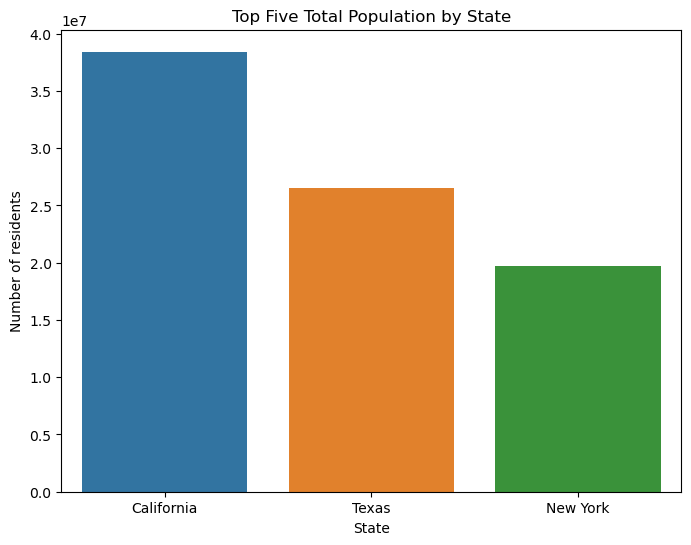

In [193]:
top_5_pop = us_census.sort_values('TotalPop', axis=0, ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x='State', y='TotalPop', data=top_5_pop)
plt.title('Top Five Total Population by State')
plt.ylabel('Number of residents')
plt.show()

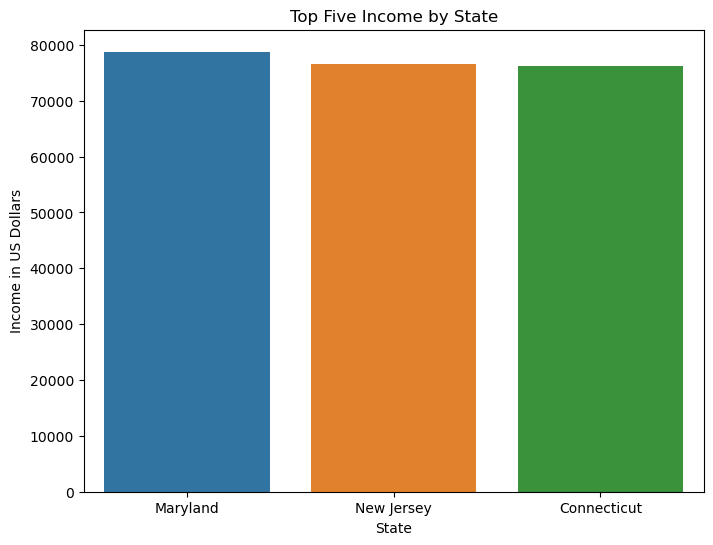

In [194]:
top_5_income = us_census.sort_values('Income', axis=0, ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x='State', y='Income', data=top_5_income)
plt.title('Top Five Income by State')
plt.ylabel('Income in US Dollars')
plt.show()

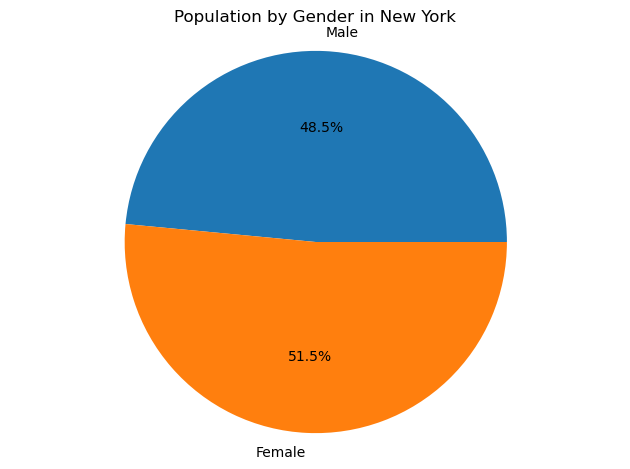

In [195]:
ny_census=us_census[us_census['State']=='New York'] # filter data for states of new york
ny_gender=['Male','Female']
ny_census=ny_census.dropna()
ny_gender_count=[int(ny_census.MalePop.iloc[0]), int(ny_census.FemalePop.iloc[0])]

plt.pie(ny_gender_count,labels=ny_gender,autopct='%0.1f%%')
plt.title('Population by Gender in New York')
plt.axis('equal')
plt.tight_layout()
plt.show()

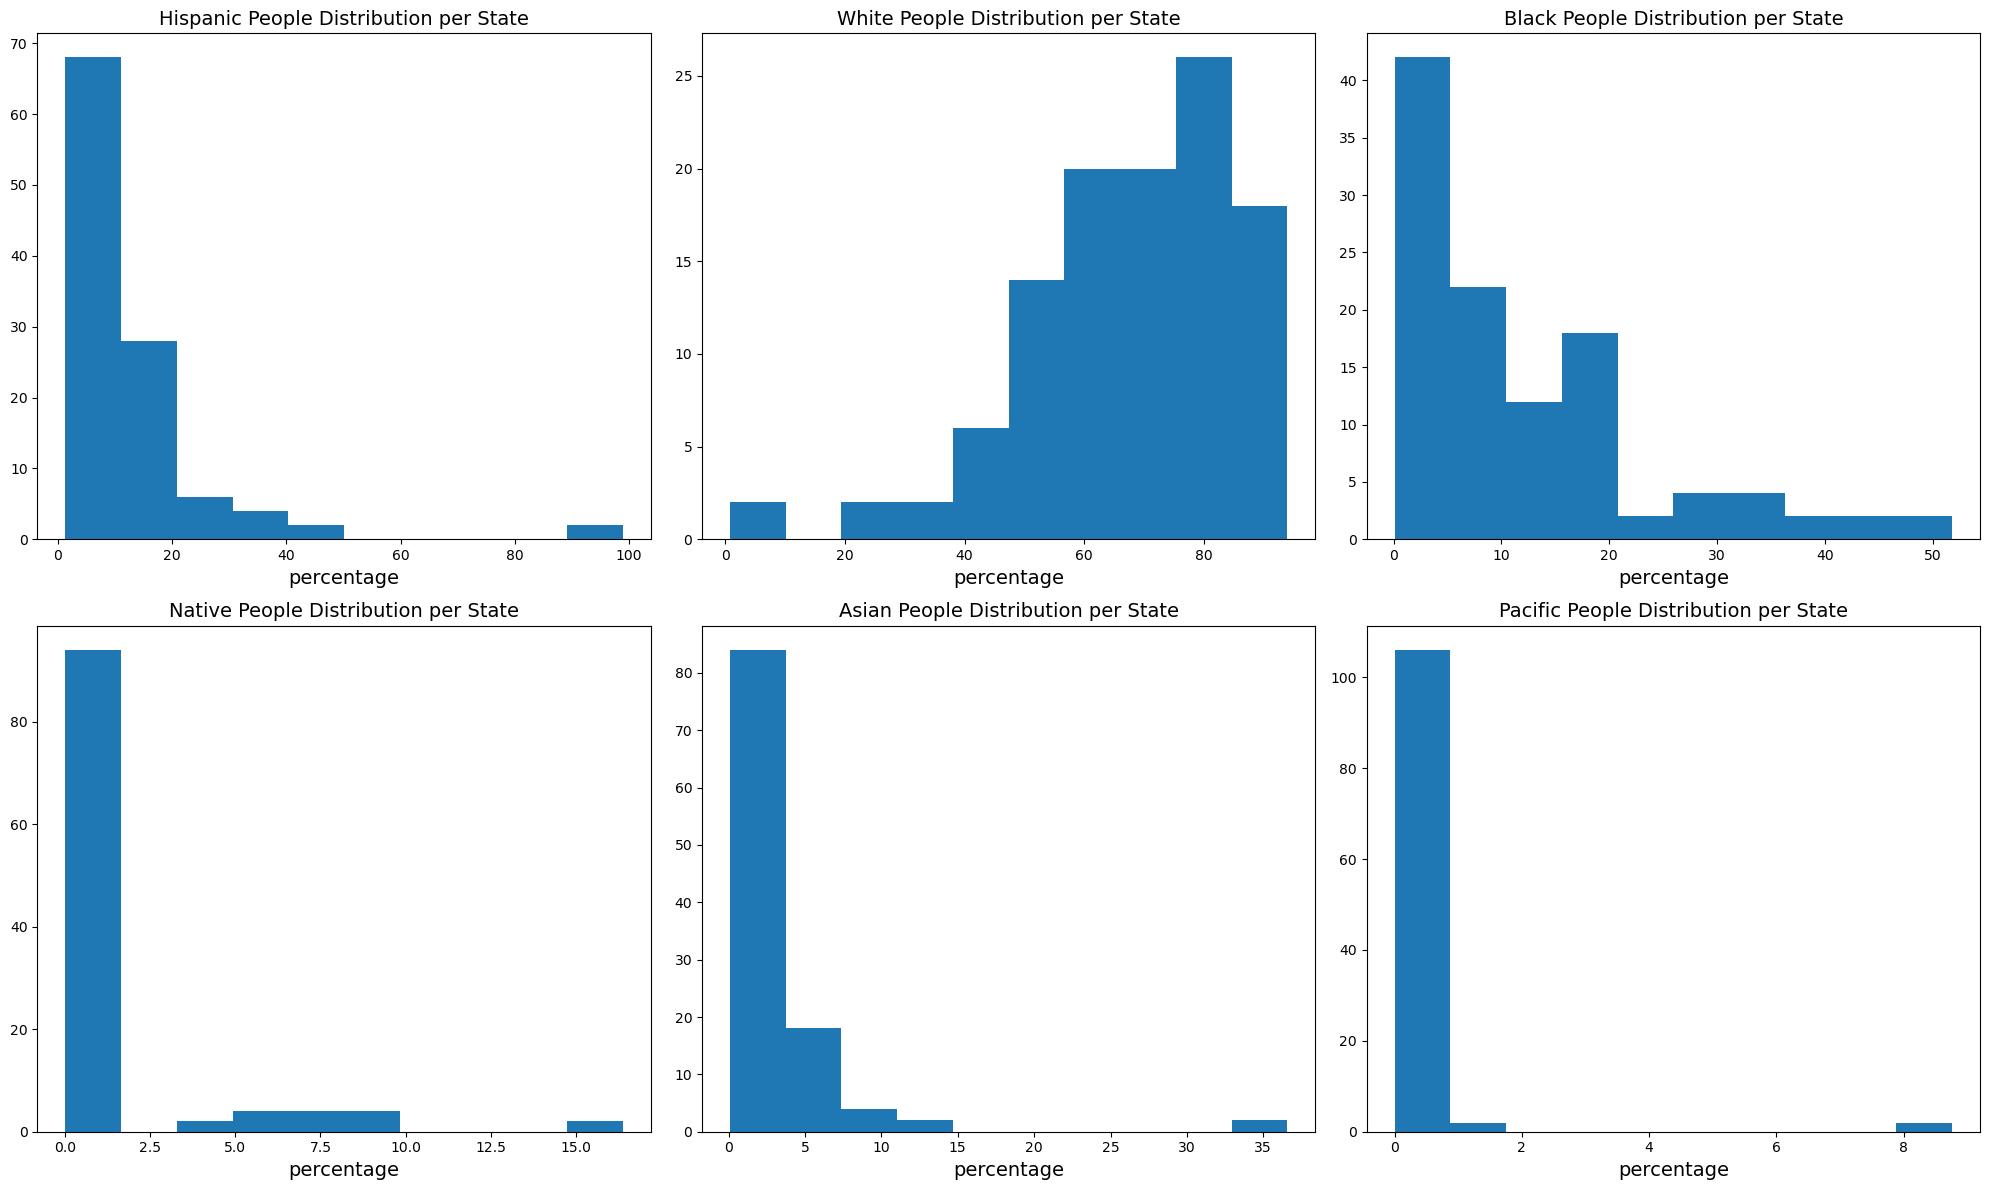

In [196]:
plt.figure(figsize=(20, 12))
for i in range(0, len(race_column)):
    plt.subplot(2, 3, i+1)
    plt.hist(race_column[i], data=us_census)
    plt.xlabel('percentage', fontsize=14)
    plt.title(f'{race_column[i]} People Distribution per State', fontsize=14)
    plt.tight_layout()

From races distribution we can see that white people histogram are skewed to the left, while the rest of the histograms are skewed to the right. It appears that white people are the most common races in United States.

There is some unique observation in Hispanic people histogram.The are bins that occupy the 90-100 percentage range

In [197]:
us_census[us_census['Hispanic'] >= 90]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
39,Puerto Rico,3583073,98.89,0.77,0.09,0.0,0.08,0.0,20720.54,NaN,NaN
156,Puerto Rico,3583073,98.89,0.77,0.09,0.0,0.08,0.0,20720.54,1713860.0,1869213.0


Hispanic people populates 98.89% of population in Puerto Rico!The value in this observation seems to be extreme, double-checking with data from other source will help us validate the accuracy of our data.

## Conclusion

Through cleaning this dataset, we can obtain informative findings that previously would be impossible. So far, what we have done for cleaning data are:
<ul>
    <li>Remove unused column</li>
    <li>Create new columns based on existing column</li>
    <li>Convert data type to another type</li>
    <li>Check and handle missing values</li>
    <li>Check and drop duplicated data</li>
</ul>